/var/folders/cq/d8h3wnqx5yd2tjl34nkmynr80000gn/T/ipykernel_33047/3477444416.py:4: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  WI_fire = pd.read_csv("WI_fire.csv")


Text(0, 0.5, 'Latitude')

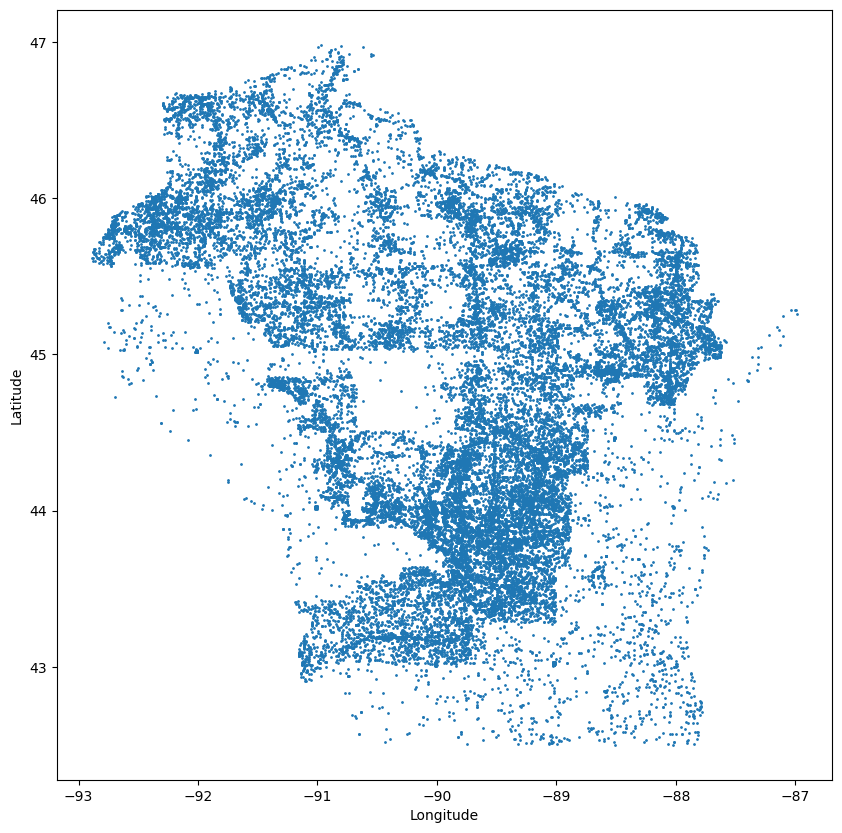

In [8]:
import pandas as pd
import matplotlib.pyplot as plt

WI_fire = pd.read_csv("WI_fire.csv")
WI_fire = WI_fire.loc[(WI_fire.LATITUDE>42.5) & (WI_fire.LONGITUDE > -95)]

fig, ax = plt.subplots(figsize=(10, 10))
ax.scatter(WI_fire.LONGITUDE, WI_fire.LATITUDE, s=1)
ax.set_xlabel("Longitude")
ax.set_ylabel("Latitude")

/var/folders/cq/d8h3wnqx5yd2tjl34nkmynr80000gn/T/ipykernel_33047/3310524229.py:4: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  WI_fire = pd.read_csv("WI_fire.csv")
/Users/minchen/opt/anaconda3/lib/python3.9/site-packages/pandas/plotting/_matplotlib/core.py:1114: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(


<AxesSubplot: xlabel='LONGITUDE', ylabel='LATITUDE'>

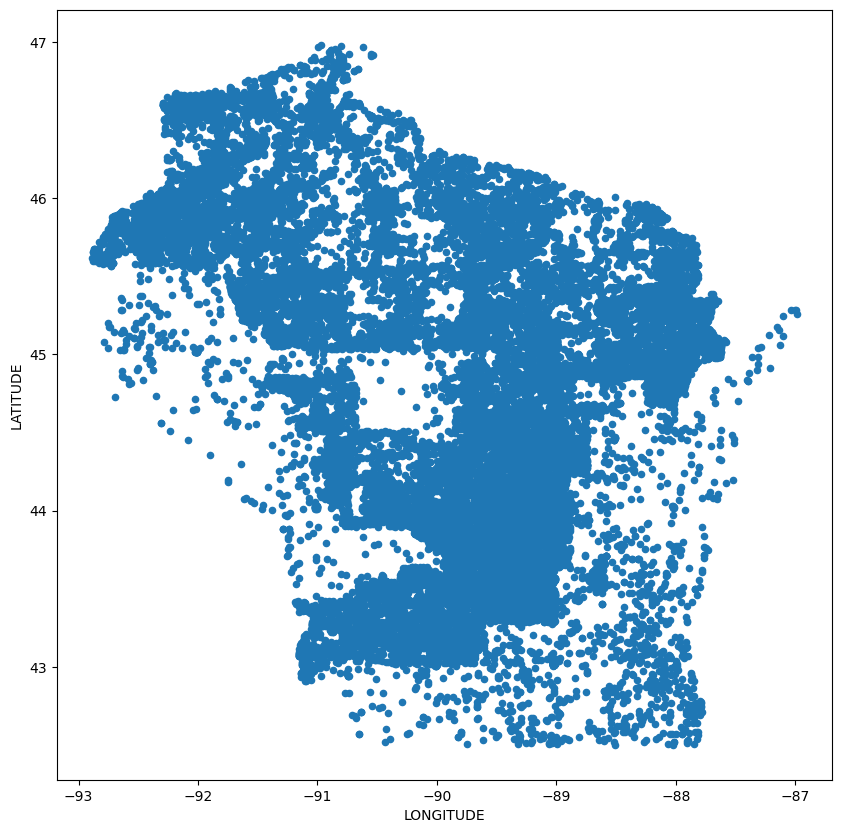

In [11]:
import pandas as pd
import matplotlib.pyplot as plt

WI_fire = pd.read_csv("WI_fire.csv")
WI_fire = WI_fire.loc[(WI_fire.LATITUDE>42.5) & (WI_fire.LONGITUDE > -95)]

fig, ax = plt.subplots(figsize=(10, 10))
#ax.scatter(WI_fire.LONGITUDE, WI_fire.LATITUDE, s=2, c=WI_fire.CONT_TIME, cmap='Reds')
#ax.set_xlabel("Longitude")
#ax.set_ylabel("Latitude")

WI_fire.plot(ax = ax, x = "LONGITUDE", y="LATITUDE", kind="scatter")


In [16]:
import geopandas as gpd
#import geoplot as gplt
#import geoplot.crs as gcrs

WI = gpd.read_file("WI_County_Boundaries_24K/County_Boundaries_24K.shp")
WI
print(WI.crs)
WI_wgs84 = WI.to_crs({'init':'epsg:4326'})
print(WI_wgs84.crs)

PROJCS["NAD_1983_HARN_Wisconsin_TM",GEOGCS["GCS_North_American_1983_HARN",DATUM["D_North_American_1983_HARN",SPHEROID["GRS_1980",6378137,298.257222101]],PRIMEM["Greenwich",0],UNIT["Degree",0.0174532925199433]],PROJECTION["Transverse_Mercator"],PARAMETER["latitude_of_origin",0],PARAMETER["central_meridian",-90],PARAMETER["scale_factor",0.9996],PARAMETER["false_easting",520000],PARAMETER["false_northing",-4480000],UNIT["Meter",1],AXIS["Easting",EAST],AXIS["Northing",NORTH]]


/Users/minchen/opt/anaconda3/lib/python3.9/site-packages/pyproj/crs/crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


+init=epsg:4326 +type=crs


In [18]:
import geoplot as gplt
import geoplot.crs as gcrs

fig, ax =plt.subplots(figsize=(8,8))
WI_wgs84.plot(ax=ax)
ax.scatter(WI_fire.LONGITUDE, WI_fire.LATITUDE, s=2, c=WI_fire.CONT_TIME, cmap='Reds')
ax.set_xlabel("Longitude")
ax.set_ylabel("Latitude")

ModuleNotFoundError: No module named 'cartopy'

In [22]:
import geopandas as gpd
world = gpd.read_file("World_Countries_shp/World_Countries__Generalized_.shp")
world
print(world.crs)

GEOGCS["WGS 84",DATUM["WGS_1984",SPHEROID["WGS 84",6378137,298.257223563,AUTHORITY["EPSG","7030"]],AUTHORITY["EPSG","6326"]],PRIMEM["Greenwich",0],UNIT["Degree",0.0174532925199433],AXIS["Longitude",EAST],AXIS["Latitude",NORTH]]


<AxesSubplot: >

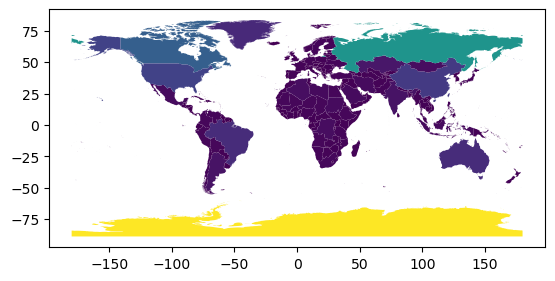

In [24]:
world.plot("SHAPE_Area")

In [25]:
import geoplot as gplt
gplt.polyplot(world)

ModuleNotFoundError: No module named 'cartopy'

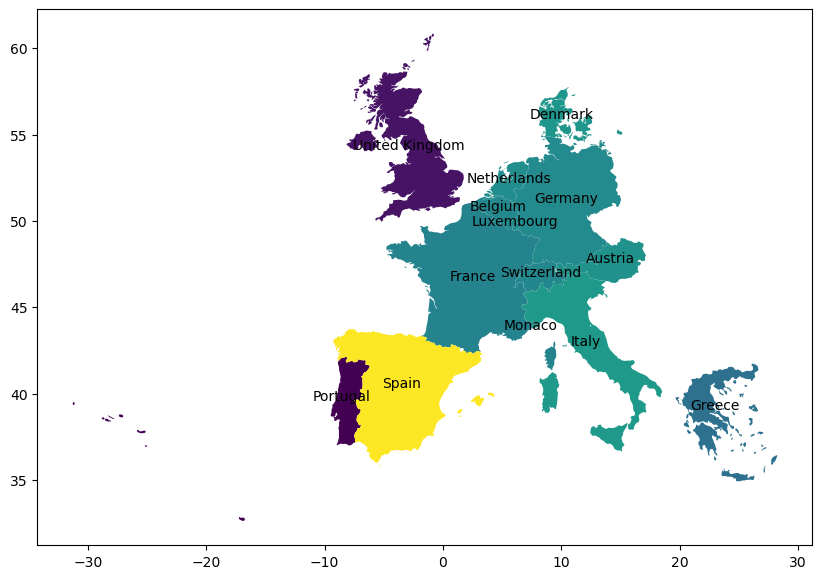

In [34]:
Europe = world.loc[world["COUNTRY"].isin(['United Kingdom', 'France', 'Germany', 'Spain', 'Portugal', 'Italy', 'Belgium',
                                         'Luxembourg', 'Switzerland', 'Greece', 'Denmark','Netherlands','Austria','Monaco'])]

fig, ax = plt.subplots(figsize=(10,10))

Europe.plot(ax=ax, column="FID")
for i, c in Europe.iterrows():
    ax.annotate(text=c["COUNTRY"], xy=c.geometry.centroid.coords[0], ha='center')

In [37]:
import netCDF4 as nc
D = nc.Dataset("amaps.nc")
D

<class 'netCDF4._netCDF4.Dataset'>
root group (NETCDF3_CLASSIC data model, file format NETCDF3):
    Conventions: CF-1.1
    title: GISTEMP Surface Temperature Analysis: January 2023 L-OTI(degC) Anomaly vs 1951-1980
    institution: NASA Goddard Institute for Space Sciences
    source: https://data.giss.nasa.gov/gistemp/
    history: Created 2023-02-28 10:58 EST by amaps_netcdf.cgi 1.2 using parameters GHCNv4_ERSSTv5_1200km_Anom_1_2023_2023_1951_1980_100_180_90_0_2_
    dimensions(sizes): lat(90), lon(180)
    variables(dimensions): float32 lon(lon), float32 lat(lat), float32 TEMPANOMALY(lat, lon)
    groups: 

In [38]:
for dim in D.dimensions.values():
    print(dim)

<class 'netCDF4._netCDF4.Dimension'>: name = 'lat', size = 90
<class 'netCDF4._netCDF4.Dimension'>: name = 'lon', size = 180


In [39]:
for var in D.variables.values():
    print(var)

<class 'netCDF4._netCDF4.Variable'>
float32 lon(lon)
    long_name: Longitude
    standard_name: longitude
    units: degrees_east
unlimited dimensions: 
current shape = (180,)
filling on, default _FillValue of 9.969209968386869e+36 used
<class 'netCDF4._netCDF4.Variable'>
float32 lat(lat)
    long_name: Latitude
    standard_name: latitude
    units: degrees_north
unlimited dimensions: 
current shape = (90,)
filling on, default _FillValue of 9.969209968386869e+36 used
<class 'netCDF4._netCDF4.Variable'>
float32 TEMPANOMALY(lat, lon)
    long_name: Temperature anomaly
    standard_name: surface_temperature_anomaly
    missing_value: 9999.0
    units: K
unlimited dimensions: 
current shape = (90, 180)
filling on, default _FillValue of 9.969209968386869e+36 used


In [41]:
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.basemap import Basemap

